# Import Packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import pytz 
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import ast
import string
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from googletrans import Translator

# Import Data

In [2]:
df = pd.read_csv('data/data_extraction/piala_dunia4.csv')

jakarta = pytz.timezone('Asia/Jakarta')
df['datetime_created'] = df['created_at'].apply(lambda x: datetime.strptime(x,'%a %b %d %H:%M:%S %z %Y').replace(tzinfo=pytz.UTC).astimezone(jakarta))
df['date_created'] = df['datetime_created'].apply(lambda x: x.date())
df['time_created'] = df['datetime_created'].apply(lambda x: x.time())
df = df.drop(['datetime_created'],axis=1)

In [3]:
df.head(10)

,id,created_at,source,original_text,clean_text,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,date_created,time_created
0,1606992735202050048,Sun Dec 25 12:38:19 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @andhikamppp: Karena masih belum ada yang n...,ngajakin arisan iseng cari tools gampang tutorial,in,0,148,ALO_RHL,NaN,WorldCup2022,andhikamppp,"Depok, Jawa Barat",NaN,2022-12-25,19:38:19
1,1606991019928608768,Sun Dec 25 12:31:30 +0000 2022,"<a href=""https://about.twitter.com/products/tw...","Tanpa juara Piala Dunia pun, Messi sudah sejaj...",juara piala dunia messi sejajar pele maradona,in,0,0,bolacomID,False,"EmtekWorldCup2022, BolacomWorldCup2022, PialaD...",NaN,Indonesia,NaN,2022-12-25,19:31:30
2,1606989939216093187,Sun Dec 25 12:27:12 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @GOAL_ID: 2022 menjadi tahun yang luar bias...,lionel messi https,in,0,9,ARmadillo_212,NaN,"MegaBintang, Argentina, PialaDunia2022, FIFAWo...",GOAL_ID,"Surakarta, Jawa Tengah",NaN,2022-12-25,19:27:12
3,1606989935126663169,Sun Dec 25 12:27:11 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @IrsatOfficial: @SiaranBolaLive Kayanya ora...,kayaknya jelek jelekin qatar barat iri pildun ...,in,0,3,__irawan__,NaN,NaN,"IrsatOfficial, SiaranBolaLive",NaN,NaN,2022-12-25,19:27:11
4,1606989727873527809,Sun Dec 25 12:26:22 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @Gargi32354857: Thanks so much 🙏🏽🙏🏽🙇🏼‍♀️💃🏽...,terima kasih so much we all must,en,0,88,KRISHNAVALA11,NaN,"ScoreForSoil, SaveSoil, SauvonsLesSols, Worldc...",Gargi32354857,NaN,NaN,2022-12-25,19:26:22
5,1606988472568381441,Sun Dec 25 12:21:22 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",دین کا کام صرف اللّٰہ کی توفیق سے\r\n#خاتم_الن...,NaN,ur,0,0,Muslims7373,False,"خاتم_النبیین_محمّدﷺّ, اردو_زبان, اردو_ادب, ستا...",NaN,NaN,NaN,2022-12-25,19:21:22
6,1606981323671076864,Sun Dec 25 11:52:58 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @GOAL_ID: 2022 menjadi tahun yang luar bias...,lionel messi https,in,0,9,AntoCungkring2,NaN,"MegaBintang, Argentina, PialaDunia2022, FIFAWo...",GOAL_ID,NaN,NaN,2022-12-25,18:52:58
7,1606979138900099072,Sun Dec 25 11:44:17 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @IrsatOfficial: @SiaranBolaLive Kayanya ora...,kayaknya jelek jelekin qatar barat iri pildun ...,in,0,3,mfirsan,NaN,NaN,"IrsatOfficial, SiaranBolaLive",NaN,NaN,2022-12-25,18:44:17
8,1606977282807324673,Sun Dec 25 11:36:55 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",@FaktaSepakbola Karena Giroud nenek buyutnya a...,giroud nenek buyutnya asli italia italia amp r...,in,0,0,creepylogy_,NaN,NaN,"FaktaSepakbola, SerieA_Lawas","Denpasar Selatan, Indonesia",NaN,2022-12-25,18:36:55
9,1606976244993908738,Sun Dec 25 11:32:47 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @GOAL_ID: 2022 menjadi tahun yang luar bias...,lionel messi https,in,0,9,ayuprdita,NaN,"MegaBintang, Argentina, PialaDunia2022, FIFAWo...",GOAL_ID,"Magelang Selatan, Indonesia",NaN,2022-12-25,18:32:47


In [4]:
len(df)

8073

Removing Duplicate if any

In [5]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [6]:
len(df)

8073

# Extra Cleaning

In [7]:
len(df[df['clean_text'].isnull()==True])

903

In [8]:
pd.set_option('display.max_colwidth', None)
df[df['clean_text'].isnull()==True]['original_text']

5                                                                 دین کا کام صرف اللّٰہ کی توفیق سے\r\n#خاتم_النبیین_محمّدﷺّ \r\n#اردو_زبان \r\n#اردو_ادب \r\n#ستارے_صحابہ\r\n#SearchTheTruth \r\n#PakistanZindabad \r\n#PakistanCricket \r\n#WorldCup2022 \r\n#WorldcupQatar2022 \r\n#Trueislam https://t.co/SP6y7rOlLa
23      #QatarWorldCup2022 #Qatar2022 #Quito #QuaiNetwork #QatarWorldCup #quackityfanart #quotes #WinterStorm #WorldcupQatar2022 #WorldCup2022 #WhiteGirl #whamageddon #WeStandWithMegan #Ethereum #EmilyInParis #Eraserheads2022 #Evri #Enflasyon #EXO #RebornRichEp15 #art #RIPMampintsha #Job https://t.co/MYwQWjndqV
87                                                                                                                                                                                                RT @bona00114: @funassyi きっと2-0 で勝つわなっしー♪\r\n#WorldcupQatar2022 \r\n#日本対コスタリカ\r\n#Worldcup2022 https://t.co/Ftvcz0wD5D
89                                                           

Menghapus pengamatan bahwa teks menjadi kosong setelah dibersihkan, menunjukkan bahwa teks tidak memiliki sentimen penting

In [9]:
df = df.dropna(subset=['clean_text'])
df = df.reset_index(drop=True)

In [10]:
df.isnull().sum()

id                           0
created_at                   0
source                       0
original_text                0
clean_text                   0
lang                         0
favorite_count               0
retweet_count                0
original_author              0
possibly_sensitive        4271
hashtags                  1955
user_mentions             2713
place                     2889
place_coord_boundaries    7087
date_created                 0
time_created                 0
dtype: int64

In [11]:
df[df['lang']!='in']['lang'].value_counts()

en     2499
es      331
und     119
fr      103
tr       67
pt       43
it       30
pl       28
ja       26
el       23
tl       18
ca       11
sl       11
nl        9
ar        7
et        6
fi        6
th        6
hi        5
da        4
ht        3
hu        2
ro        2
de        2
zh        2
is        1
cs        1
lv        1
no        1
sv        1
kn        1
Name: lang, dtype: int64

Karena ada beberapa kata yang tidak dalam bahasa Indonesia, mungkin orang Indonesia menggunakan bahasa lain untuk tweet, teks tersebut akan diterjemahkan untuk memproses teks

In [12]:
def trans(x,src):
    translator = Translator()
    try:
        sentence = translator.translate(x, src=src,dest='id').text
    except:
        sentence = x
    return sentence

In [13]:
df['clean_text'] = df.apply(lambda x: trans(x['clean_text'],x['lang']) if(x['lang']!='in') else x['clean_text'],axis=1)

In [14]:
clean_text = df['clean_text'].copy()

In [15]:
pd.set_option('display.max_colwidth', 100)
clean_text.tail(15)

7155                                                    argentina campen del mundo copa regresa a sudamrica
7156                                                                                  got his f last but is
7157       pildun terseru pildun qatar edaan kejutan finalnya woowww ter hype samina mina e e waka waka e e
7158                   aft argentina prancis messi pen maria mbappe pen pen penalti selamat argentina juara
7159                                                  yey congrats argentinadoi kalah taruhan tidak beli ps
7160                      bersejarah desember france hebat kalah diadupinaliti argentina juara pildun qatar
7161                                              hasil pertandingan final piala dunia argentina vs prancis
7162                                                                                                    amp
7163    argentina berhasil juara melewati laga bikin dag dig dug sweet last dance leo messi perancis goo...
7164                        

In [16]:
def repair_exaggeration(x):
    word_tokens = word_tokenize(x)
    new_x =''
    for i in word_tokens:
        if (i =='psbb'):
            new = re.sub(r'(\w)\1\1+',r'\1\1',i)
            new_x = new_x +new+' '
        elif(i =='psb'):
            new = 'psbb'
            new_x = new_x +new+' '
        else:
            new = re.sub(r'(\w)\1\1\1+',r'\1',i)
            new_x = new_x +new+' '
    return new_x

def del_word(x,key_list):
    n = len(key_list)
    word_tokens = word_tokenize(x)
    new_x =''
    for word in word_tokens:
        if word not in key_list:
            new_x = new_x+word+' '
    return new_x

def clean_tweets(tweet):
   # nltk.download('stopwords')
    my_file = open("cleaning_source/combined_stop_words.txt", "r")
    content = my_file.read()
    stop_words = content.split("\n")
    file_2  = open("cleaning_source/update_combined_slang_words.txt", "r")
    content2 = file_2.read()
    slang_words = ast.literal_eval(content2)
    my_file.close()
    file_2.close()

    tweet = tweet.lower()
    #after tweepy preprocessing the colon left remain after removing mentions
    #or RT sign in the beginning of the tweet
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)

    #remove emojis from tweet
    #tweet = emoji_pattern.sub(r'', tweet)
    
    #remove punctuation manually
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    
    #remove tags
    tweet=re.sub("&lt;/?.*?&gt;","&lt;&gt;",tweet)
    
    #remove digits and special chars
    tweet=re.sub("(\\d|\\W)+"," ",tweet)

    #remove other symbol from tweet
    tweet = re.sub(r'â', '', tweet)
    tweet = re.sub(r'€', '', tweet)
    tweet = re.sub(r'¦', '', tweet)

    word_tokens = word_tokenize(tweet)
    for w in word_tokens:
        if w in slang_words.keys():
            word_tokens[word_tokens.index(w)] = slang_words[w]

    #filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []

    #looping through conditions
    for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in string.punctuation:
            filtered_tweet.append(w.lower())
    return ' '.join(filtered_tweet)

def count_words(x):
    words = word_tokenize(x)
    n=len(words)
    return n

Cleaning text that exaggerate the typing such as 'psbbbbbbbbb' 

In [17]:
clean_text_exag = clean_text.apply(lambda x: repair_exaggeration(x))

In [18]:
clean_text_exag.tail(15)

7155                                                   argentina campen del mundo copa regresa a sudamrica 
7156                                                                                 got his f last but is 
7157      pildun terseru pildun qatar edaan kejutan finalnya woowww ter hype samina mina e e waka waka e e 
7158                  aft argentina prancis messi pen maria mbappe pen pen penalti selamat argentina juara 
7159                                                 yey congrats argentinadoi kalah taruhan tidak beli ps 
7160                     bersejarah desember france hebat kalah diadupinaliti argentina juara pildun qatar 
7161                                             hasil pertandingan final piala dunia argentina vs prancis 
7162                                                                                                   amp 
7163    argentina berhasil juara melewati laga bikin dag dig dug sweet last dance leo messi perancis goo...
7164                        

Recleaning after remove exaggeration

In [19]:
re_clean = clean_text_exag.apply(lambda x: clean_tweets(x))

Kami menggunakan kata kunci untuk meminta data, sekarang kami perlu menghapusnya karena semuanya akan ditemukan di setiap kalimat dalam bingkai data ini

In [20]:
keyword = ['psbb','psb','corona','covid19','indonesia','pemerintah','wfh','covid']
clean_text_extra = re_clean.apply(lambda x: del_word(x,keyword))

In [21]:
clean_text_extra.tail(15)

7155                                                   argentina campen del mundo copa regresa a sudamrica 
7156                                                                                 got his f last but is 
7157      pildun terseru pildun qatar edaan kejutan finalnya woowww ter hype samina mina e e waka waka e e 
7158                  aft argentina prancis messi pen maria mbappe pen pen penalti selamat argentina juara 
7159                                                 yey congrats argentinadoi kalah taruhan tidak beli ps 
7160                     bersejarah desember france hebat kalah diadupinaliti argentina juara pildun qatar 
7161                                             hasil pertandingan final piala dunia argentina vs prancis 
7162                                                                                                   amp 
7163    argentina berhasil juara melewati laga bikin dag dig dug sweet last dance leo messi perancis goo...
7164                        

In [22]:
df['clean_text'] = clean_text_extra

In [23]:
df['word_length'] = df['clean_text'].apply(lambda x:count_words(x))

In [24]:
df['word_length'].value_counts().sort_index()

1      176
2      214
3      185
4      250
5      394
6      402
7      426
8      536
9      447
10    1243
11     517
12     284
13     258
14     323
15     135
16     145
17     109
18     643
19      68
20      75
21      52
22      50
23      37
24      32
25      23
26      32
27      21
28      16
29      15
30      15
31      15
32       3
33       5
34       5
35       1
36       5
37       5
38       2
39       2
40       2
43       2
Name: word_length, dtype: int64

In [25]:
df = df.drop(df[df['word_length']==0].index,axis=0)
df = df.reset_index(drop=True)

# Word Processing

## Create word dictionary

In [26]:
word_dict = {}
for i in range(0,len(df['clean_text'])):
    sentence = df['clean_text'][i]
    word_token = word_tokenize(sentence)
    for j in word_token:
        if j not in word_dict:
            word_dict[j] = 1
        else:
            word_dict[j] += 1

In [27]:
len(word_dict)

8473

In [28]:
len({k:v for (k,v) in word_dict.items() if v < 4})

6432

## Import Lexicon data

Impor leksikon, dan hapus kata -kata negasi dari leksikon, leksikon adalah kombinasi dari beberapa sumber di bawah ini, yang digabungkan bersama, dan termasuk kata -kata bersumpah yang memiliki skor paling negatif

sources : <br>
https://github.com/louisowen6/NLP_bahasa_resources <br>
https://github.com/abhimantramb/elang/blob/master/word2vec/utils/swear-words.txt <br>
https://github.com/fajri91/InSet <br>
https://github.com/agusmakmun/SentiStrengthID/blob/master/id_dict/sentimentword.txt 

In [29]:
negasi = ['bukan','tidak','ga','gk']
lexicon = pd.read_csv('lexicon/modified_full_lexicon.csv')
lexicon = lexicon.drop(lexicon[(lexicon['word'] == 'bukan')
                               |(lexicon['word'] == 'tidak')
                               |(lexicon['word'] == 'ga')|(lexicon['word'] == 'gk') ].index,axis=0)
lexicon = lexicon.reset_index(drop=True)

In [30]:
len(lexicon)

10248

In [31]:
lexicon.head(10)

,word,weight,number_of_words
0,hai,3,1
1,merekam,2,1
2,ekstensif,3,1
3,paripurna,1,1
4,detail,2,1
5,pernik,3,1
6,belas,2,1
7,welas,4,1
8,kabung,1,1
9,rahayu,4,1


In [32]:
lexicon_word = lexicon['word'].to_list()
lexicon_num_words = lexicon['number_of_words']

In [33]:
len(lexicon_word)

10248

Memeriksa apakah ada kata -kata dalam kamus yang tidak termasuk dalam leksikon

In [34]:
ns_words = []
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for word in word_dict.keys():
    if word not in lexicon_word:
        kata_dasar = stemmer.stem(word)
        if kata_dasar not in lexicon_word:
            ns_words.append(word)
len(ns_words)

6660

Mari kita lihat kata -kata seperti apa mereka, mari kita mulai dengan beberapa kata yang memiliki banyak kejadian karena ini kemungkinan besar bukan tipe case

In [35]:
len({k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3)) })

1479

In [36]:
ns_words_list = {k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3))}

Ternyata kata -kata yang tidak termasuk dalam leksikon, adalah orang yang tidak memiliki sentimen signifikan

In [37]:
sort_orders = sorted(ns_words_list.items(), key=lambda x: x[1], reverse=True)
sort_orders=sort_orders[0:20]
for i in sort_orders:
    print(i[0], i[1])

argentina 2786
i 1741
qatar 1544
piala 1223
pildun 1201
messi 1174
to 1140
fifa 875
and 821
so 819
world 726
it 687
cup 668
acaranya 663
bahahahahahahah 663
france 639
juara 622
like 589
but 575
an 568


In [38]:
word_to_plot = df['clean_text'].copy()

In [39]:
word_to_plot_1 = word_to_plot.apply(lambda x: del_word(x,negasi))

Membuat kata cloud untuk melihat kata -kata seperti apa yang sering muncul di tweet yang terkait dengan pandemi

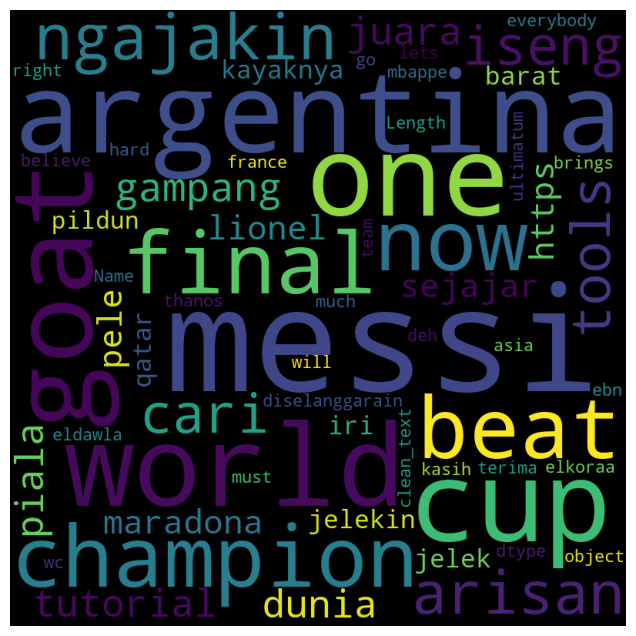

In [40]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 1000
                      , min_font_size = 20).generate(str(word_to_plot_1))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## sentiment

In [41]:
lexicon['number_of_words'].value_counts()

1    9536
2     686
3      24
4       2
Name: number_of_words, dtype: int64

In [42]:
'pekerti' in word_dict

False

In [43]:
'budi baik' in lexicon_word

True

Menghitung sentimen kata -kata dengan memasukkannya ke leksikon sambil juga membuat kantong kata -kata matriks

In [44]:
sencol =[]
senrow =np.array([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []
# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # if it is already included in the bag of words matrix, then just increase the value
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #if not, than add new word
        sencol.append(word)
        sen.append(1)
        add += 1
    #if there is a negation word before it, the sentiment would be the negation of it's sentiment
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]
    
    return sen,sencol,sentiment,add
            
# checking every words, if they are appear in the lexicon, and then calculate their sentiment if they do
for i in range(len(df)):
    nsen = senrow.shape[0]
    words = word_tokenize(df['clean_text'][i])
    sentiment = 0 
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]
    
    for word in words:
        ind = words.index(word)
        # check whether they are included in the lexicon
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
        # if not, then check the root word
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
        # if still negative, try to match the combination of words with the adjacent words
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    # if there is new word founded, then expand the matrix
    if add>0:  
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    # if there isn't then just update the old matrix
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))
        
    sentiment_list.append(sentiment)

In [45]:
len(sentiment_list)

7170

In [46]:
print(senrow.shape[0])

7170


Membangun bingkai data yang berisi kantong kata dan sentimen yang telah dihitung sebelumnya

In [47]:
sencol.append('sentiment')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
df_sen = pd.DataFrame(sentiment_data,columns = sencol)

In [48]:
df_sen.head(10)

,iseng,cari,gampang,dunia,kayaknya,jelek,iri,terima,kasih,buyut,...,tensi,penghabisan,puyeng,kejar,terikat,jin,mengacak,hujung,melewati,sentiment
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-2
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-12
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,4
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-12
7,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,11
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Mari kita lihat apakah sentimennya benar dengan melihat teks aslinya

In [49]:
cek_df = pd.DataFrame([])
cek_df['text'] = df['original_text'].copy()
cek_df['sentiment']  = df_sen['sentiment'].copy()

In [50]:
cek_df.head(10)

,text,sentiment
0,RT @andhikamppp: Karena masih belum ada yang ngajakin arisan #WorldCup2022 . Iseng cari tools ya...,-2
1,"Tanpa juara Piala Dunia pun, Messi sudah sejajar dengan Pele dan Maradona.\r\n\r\n#EmtekWorldCup...",1
2,RT @GOAL_ID: 2022 menjadi tahun yang luar biasa bagi Lionel Messi 🎄\r\n\r\n#MegaBintang #Argenti...,0
3,RT @IrsatOfficial: @SiaranBolaLive Kayanya orang yang jelek jelekin qatar cuma orang barat yang ...,-12
4,RT @Gargi32354857: Thanks so much 🙏🏽🙏🏽🙇🏼‍♀️💃🏽🎉\r\nWe all must \r\n#ScoreForSoil \r\n#SaveSoil \...,4
5,RT @GOAL_ID: 2022 menjadi tahun yang luar biasa bagi Lionel Messi 🎄\r\n\r\n#MegaBintang #Argenti...,0
6,RT @IrsatOfficial: @SiaranBolaLive Kayanya orang yang jelek jelekin qatar cuma orang barat yang ...,-12
7,@FaktaSepakbola Karena Giroud nenek buyutnya asli Italia. Orang Italia baik &amp; ramah. Karena ...,11
8,RT @GOAL_ID: 2022 menjadi tahun yang luar biasa bagi Lionel Messi 🎄\r\n\r\n#MegaBintang #Argenti...,0
9,How sick!\r\n\r\n#Qatar2022 #QatarWorldCup2022 #WorldcupQatar2022 #WorldCup2022 \r\n#Messi https...,0


# EDA

Text(0.5, 0, 'sentiment')

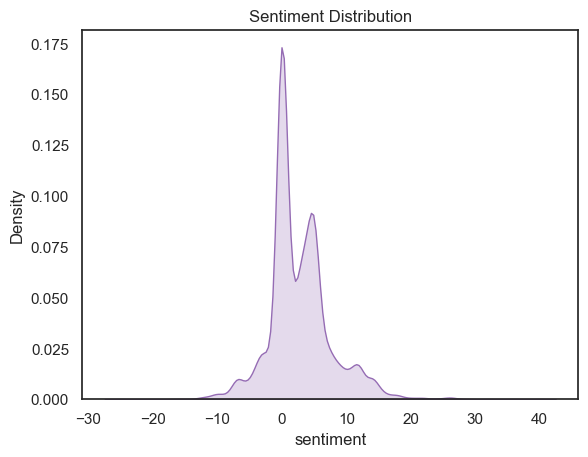

In [51]:
sns.set(style="white", palette="muted", color_codes=True)
sns.kdeplot(df_sen['sentiment'],color='m',shade=True)
plt.title('Sentiment Distribution')
plt.xlabel('sentiment')

<AxesSubplot:xlabel='sentiment'>

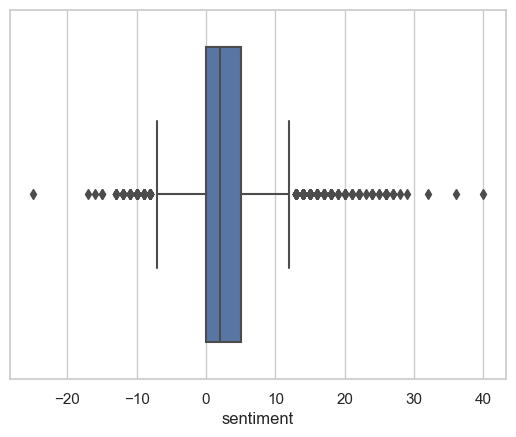

In [52]:
sns.set(style="whitegrid") 
sns.boxplot(x=df_sen['sentiment'])

Sepertinya sentimen terdistribusi secara merata antara positif dan negatif, tentu saja, mari kita lihat rata -rata

In [53]:
df_sen.describe()

,iseng,cari,gampang,dunia,kayaknya,jelek,iri,terima,kasih,buyut,...,tensi,penghabisan,puyeng,kejar,terikat,jin,mengacak,hujung,melewati,sentiment
count,7170.000000,7170.000000,7170.000000,7170.000000,7170.000000,7170.000000,7170.000000,7170.000000,7170.000000,7170.000000,...,7170.000000,7170.000000,7170.000000,7170.000000,7170.000000,7170.000000,7170.000000,7170.000000,7170.000000,7170.000000
mean,0.000139,0.000279,0.000418,0.175314,0.001953,0.001395,0.000976,0.018828,0.021199,0.000139,...,0.000139,0.000139,0.000139,0.000139,0.000139,0.000139,0.000139,0.000139,0.000139,2.661925
std,0.011810,0.016700,0.020452,0.409919,0.044148,0.037322,0.031233,0.140966,0.149756,0.011810,...,0.011810,0.011810,0.011810,0.011810,0.011810,0.011810,0.011810,0.011810,0.011810,4.892576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-25.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000


Sepertinya hampir didistribusikan secara merata, tetapi yang positif memiliki kejadian yang sedikit lebih besar di sini

Sekarang mari kita lihat korelasi antara kata -kata yang termasuk dalam sentimen

In [54]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

#print("Top Absolute Correlations")
#print(get_top_abs_correlations(df_sen, 10))
au = get_top_abs_correlations(df_sen, 15)

In [55]:
print('Perfect Correlation')
au[au==1]

Perfect Correlation


menyadari    sampul         1.0
ribut        dungu          1.0
lini         lemes          1.0
menekankan   berkualitas    1.0
duka         sembah         1.0
                           ... 
sendiri      membekas       1.0
tandang      aamiin         1.0
anugerah     jaga           1.0
kegilaan     kabur          1.0
spesifikasi  pun            1.0
Length: 172, dtype: float64

Ternyata ada 156 kata yang selalu terjadi bersama dalam setiap teks, meskipun kita tidak benar -benar melihat berapa banyak kalimat yang termasuk di sana tetapi korelasinya cukup tinggi

In [56]:
top10 = au[au<float(1)][0:10]
label = top10.index
label_list =[]
for i in label:
    for j in i:
        if(j not in label_list):
            label_list.append(j)
            
df_sen_corr = df_sen[label_list]
corr = df_sen_corr.corr()
for i in label_list:
    for j in label_list:
        if i!=j:
            corr[i][j] = round(corr[i][j],3)
            

Sekarang mari kita lihat kata lain, itu sekarang selalu tetapi sering bersatu karena korelasi cukup tinggi meskipun tidak sama dengan 1

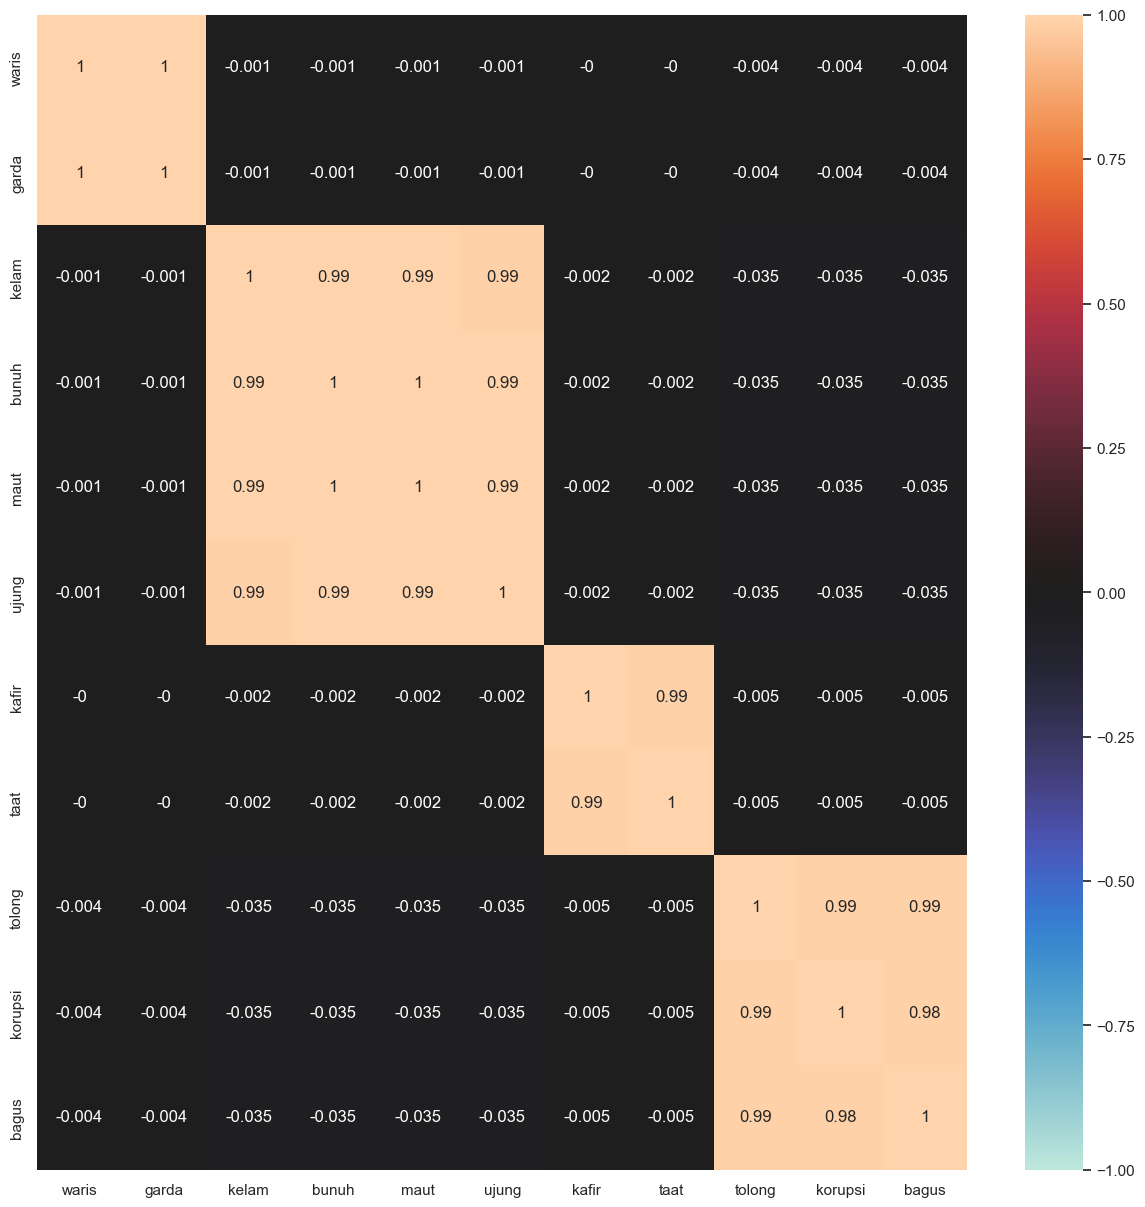

In [57]:
plt.figure(figsize=(15,15))

h = sns.heatmap(corr, annot=True,vmin=-1, vmax=1, center= 0)

plt.show()

In [58]:
top15 = au[au<float(1)][0:15]

Sepertinya kebanyakan dari mereka secara alami berkumpul bersama tetapi ada beberapa yang tidak benar -benar terlintas dalam pikiran

Sekarang mari kita lihat kata -kata yang paling terjadi di antara serangkaian kata yang termasuk dalam leksikon

In [59]:
top15_word = df_sen.drop(['sentiment'],axis=1).sum().sort_values(ascending=False)[0:15]

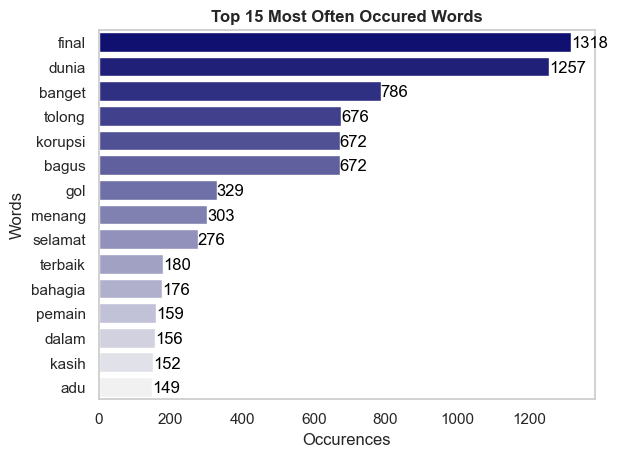

In [60]:
#pal =sns.dark_palette("purple", input="xkcd",n_colors=15)
pal =sns.light_palette("navy", reverse=True,n_colors=15)
g = sns.barplot(y = top15_word.index , x = top15_word,palette=pal)
g.grid(False)
plt.xlabel('Occurences')
plt.ylabel('Words')
plt.title("Top 15 Most Often Occured Words",fontweight='bold') 
for i in range(15):
    g.text(top15_word[i],i+0.22, top15_word[i],color='black')
plt.show()

## Beyond Words

Sekarang kami ingin mengeksplorasi lebih dari kata itu sendiri, maka kami meneruskan sentimen ke dalam dataset asli dan kemudian mengeksplorasi beberapa data di sana

In [61]:
df['sentiment'] = df_sen['sentiment']

In [62]:
df.head(5)

,id,created_at,source,original_text,clean_text,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,date_created,time_created,word_length,sentiment
0,1606992735202050048,Sun Dec 25 12:38:19 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @andhikamppp: Karena masih belum ada yang ngajakin arisan #WorldCup2022 . Iseng cari tools ya...,ngajakin arisan iseng cari tools gampang tutorial,in,0,148,ALO_RHL,NaN,WorldCup2022,andhikamppp,"Depok, Jawa Barat",NaN,2022-12-25,19:38:19,7,-2
1,1606991019928608768,Sun Dec 25 12:31:30 +0000 2022,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>","Tanpa juara Piala Dunia pun, Messi sudah sejajar dengan Pele dan Maradona.\r\n\r\n#EmtekWorldCup...",juara piala dunia messi sejajar pele maradona,in,0,0,bolacomID,False,"EmtekWorldCup2022, BolacomWorldCup2022, PialaDunia2022, PialaDunia",NaN,Indonesia,NaN,2022-12-25,19:31:30,7,1
2,1606989939216093187,Sun Dec 25 12:27:12 +0000 2022,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @GOAL_ID: 2022 menjadi tahun yang luar biasa bagi Lionel Messi 🎄\r\n\r\n#MegaBintang #Argenti...,lionel messi https,in,0,9,ARmadillo_212,NaN,"MegaBintang, Argentina, PialaDunia2022, FIFAWorldCup, Qatar2022",GOAL_ID,"Surakarta, Jawa Tengah",NaN,2022-12-25,19:27:12,3,0
3,1606989935126663169,Sun Dec 25 12:27:11 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @IrsatOfficial: @SiaranBolaLive Kayanya orang yang jelek jelekin qatar cuma orang barat yang ...,kayaknya jelek jelekin qatar barat iri pildun diselanggarain asia deh,in,0,3,__irawan__,NaN,NaN,"IrsatOfficial, SiaranBolaLive",NaN,NaN,2022-12-25,19:27:11,10,-12
4,1606989727873527809,Sun Dec 25 12:26:22 +0000 2022,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @Gargi32354857: Thanks so much 🙏🏽🙏🏽🙇🏼‍♀️💃🏽🎉\r\nWe all must \r\n#ScoreForSoil \r\n#SaveSoil \...,terima kasih so much we all must,en,0,88,KRISHNAVALA11,NaN,"ScoreForSoil, SaveSoil, SauvonsLesSols, WorldcupQatar2022, WorldCup",Gargi32354857,NaN,NaN,2022-12-25,19:26:22,7,4


In [63]:
df.isnull().sum()

id                           0
created_at                   0
source                       0
original_text                0
clean_text                   0
lang                         0
favorite_count               0
retweet_count                0
original_author              0
possibly_sensitive        4271
hashtags                  1955
user_mentions             2713
place                     2889
place_coord_boundaries    7087
date_created                 0
time_created                 0
word_length                  0
sentiment                    0
dtype: int64

Mari kita lihat faktor lain yang berkorelasi dengan sentimen itu sendiri

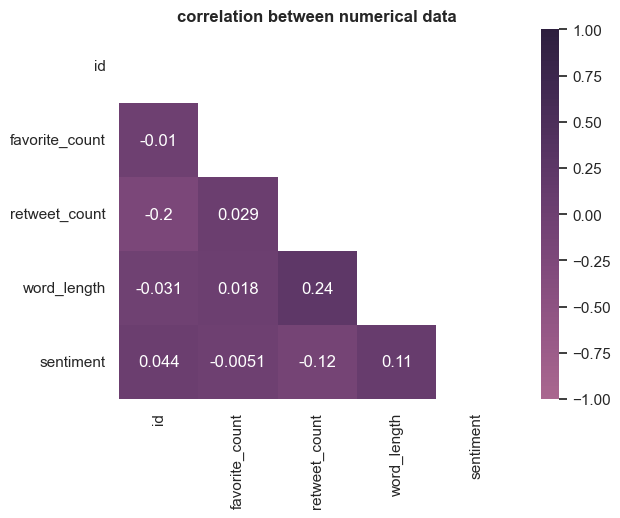

In [64]:
plt.figure()
plt.title('correlation between numerical data',fontweight='bold')
df_corr = df.corr()
matrix = np.triu(df.corr())
cmap =  sns.cubehelix_palette(light=0.5, as_cmap=True)
h = sns.heatmap(df_corr, annot=True,vmin=-1, vmax=1, center= 0,mask=matrix,cmap = cmap)

plt.show()

Dari fitur numerik, tampaknya korelasinya sangat rendah, sekarang mari kita lihat yang lain

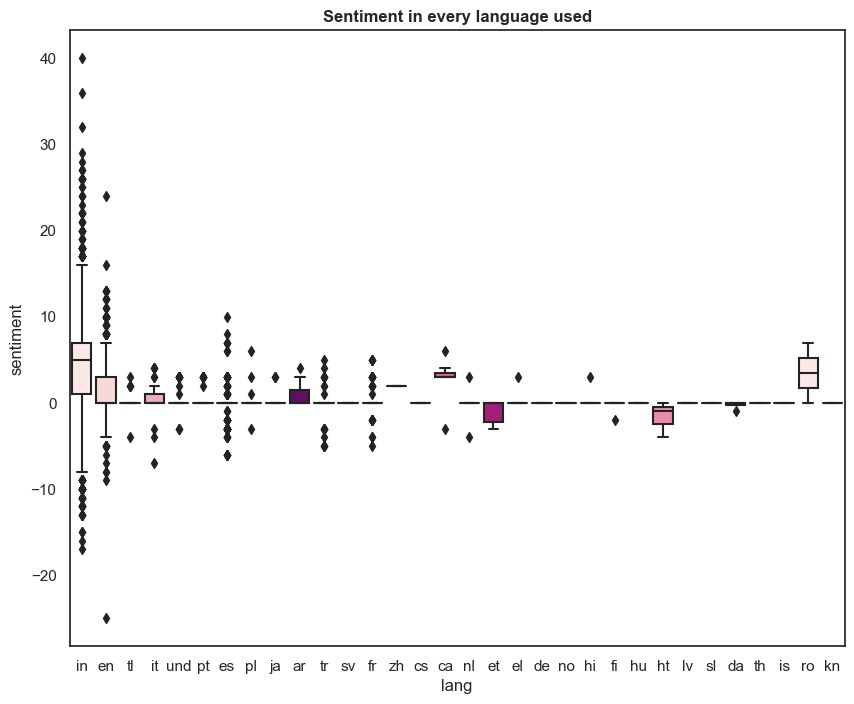

In [65]:
sns.set(style="white", color_codes=True)
plt.figure(figsize=(10,8))
plt.title('Sentiment in every language used',fontweight='bold')
l = sns.boxplot(x='lang',y='sentiment',data=df,palette= sns.color_palette("RdPu", 10))

Sepertinya orang -orang dari kerangka waktu ini bahasa 'ko' dan 'und' selalu digunakan untuk memberikan sentimen positif sementara itu sebaliknya untuk 'pt' dan 'es'

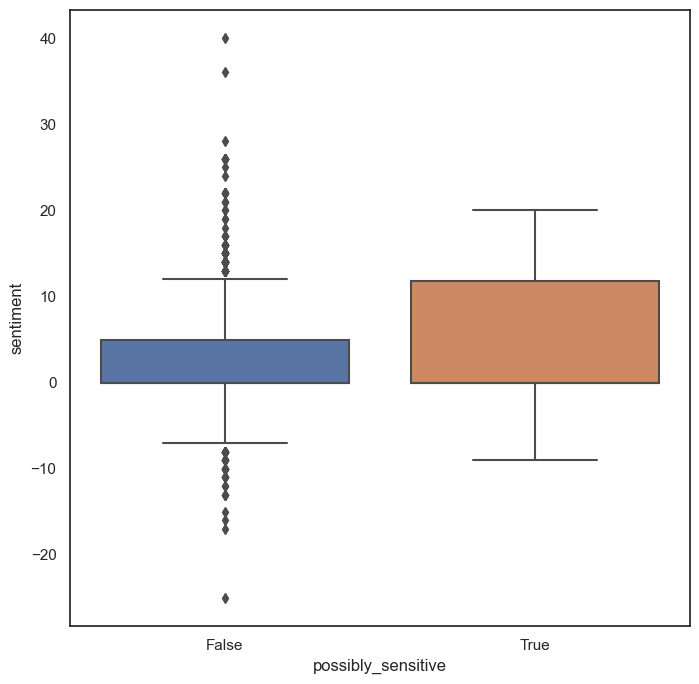

In [66]:
cek_df = df.dropna(subset=['possibly_sensitive'])
cek_df = cek_df.reset_index(drop=True)
plt.figure(figsize=(8,8))
g = sns.boxplot(x='possibly_sensitive',y='sentiment',data=cek_df)
plt.show()

Konten sensitif tidak menunjukkan pernyataan karena mereka hampir terdistribusi secara merata di antara mereka

In [67]:
df_place = df.groupby(['place']).mean().sort_values(by='sentiment',ascending=False)
df_place = df_place.reset_index()

In [68]:
df_place_dict = df.groupby(['place']).count().sort_values(by='id',ascending=False)['id'].to_dict()

In [69]:
df_place['number_of_tweets'] =  df_place.apply(lambda x:df_place_dict[x['place']],axis=1)

In [70]:
top10_place_pos = df_place.sort_values(by='sentiment',ascending=False)[0:10].reset_index(drop=True)
top10_place_neg = df_place.sort_values(by='sentiment',ascending=True)[0:10].reset_index(drop=True)
top10_place     = df_place.sort_values(by='number_of_tweets',ascending=False)[0:10].reset_index(drop=True)

Sekarang mari kita lihat beberapa tempat di mana sentimen yang dibuat darinya cenderung sensitif dan juga untuk tempat -tempat yang membuat sebaliknya

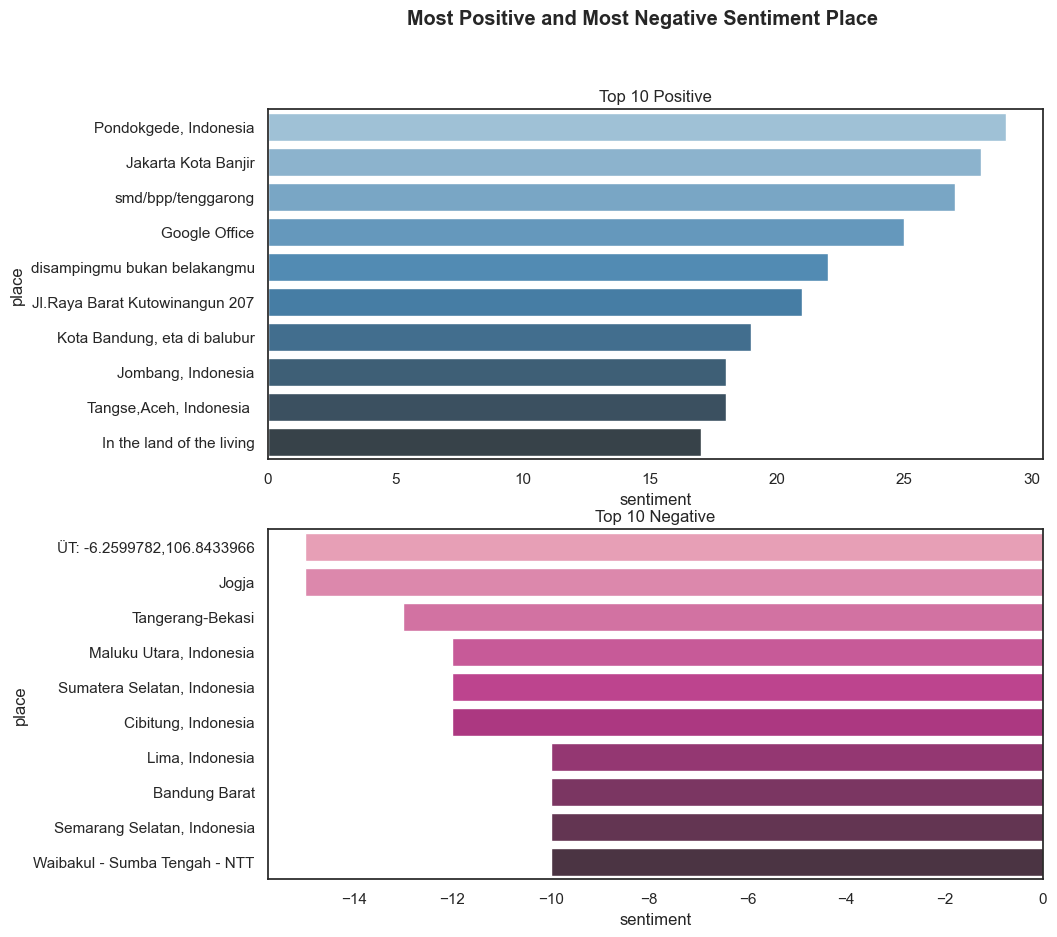

In [71]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,10))
fig.suptitle('Most Positive and Most Negative Sentiment Place',fontweight='bold')
h = sns.barplot(y='place',x='sentiment',data=top10_place_pos,ax=ax1,palette=sns.color_palette("Blues_d",n_colors=10))
n = sns.barplot(y='place',x='sentiment',data=top10_place_neg,ax=ax2,palette=sns.color_palette('RdPu_d',n_colors=10))
ax1.set_title('Top 10 Positive')
ax2.set_title('Top 10 Negative')
plt.show()

last but not least, let's take a look at some places where tweets is most often come from

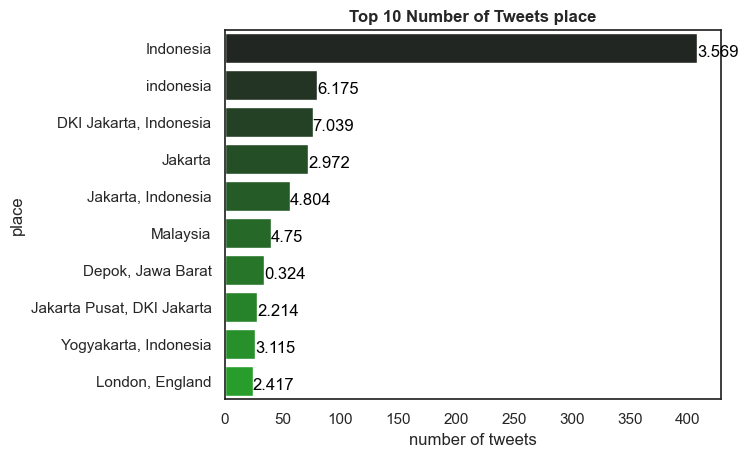

In [72]:
pal =sns.dark_palette("green", input="xkcd",n_colors=10)
g = sns.barplot(y = top10_place['place'] , x = top10_place['number_of_tweets'],palette=pal)
g.grid=False
plt.xlabel('number of tweets')
plt.ylabel('place')
plt.title("Top 10 Number of Tweets place",fontweight='bold') 

for i in range(10):
    g.text(top10_place['number_of_tweets'][i], i+0.22 ,round(top10_place['sentiment'][i],3),color='black')
    
plt.show()